In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
warnings.simplefilter("ignore")

In [3]:
np.random.seed(1)

In [5]:
train3 = loadtxt('../../data/monks-3.train',
                         delimiter=' ', usecols=range(1, 8))
test3 = loadtxt('../../data/monks-3.test',
                        delimiter=' ', usecols=range(1, 8))

In [6]:
X_train3=train3[:, 1:7]
y_train3=train3[:, 0]

X_test3=test3[:, 1:7]
y_test3=test3[:, 0]

In [8]:
enc = OneHotEncoder()

In [9]:
X_train3 = enc.fit_transform(X_train3).toarray()

X_test3 = enc.fit_transform(X_test3).toarray()

In [10]:
def create_modelCV(lr=0.1, mom=0.1, act='sigmoid', alpha=0.001):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, kernel_initializer=RandomUniform(minval=-0.01, maxval=0.01, seed=1), 
                    activation=act, kernel_regularizer=l2(alpha)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer= SGD(lr=lr, momentum=mom, nesterov=False))
    return model

## Create hyper parameter space and using Grid Search to find optimal

In [11]:
hyper_params_space = {
        'lr': [0.1, 0.3, 0.5],
        'mom': [0.01, 0.1, 0.2, 0.5, 0.8],
        'act': ['relu'],
        'alpha': [1e-5, 1e-10, 1e-15, 1e-20]
    },



print('===================================')
model = KerasClassifier(build_fn=create_modelCV, batch_size=25, epochs=150)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring=['accuracy'], refit='accuracy', cv=3, n_jobs=2)
mlpr.fit(X_train3, y_train3)
print("DONE")
resultGSCV=pd.DataFrame(mlpr.cv_results_)


2022-12-29 12:00:17.654109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 12:00:17.654109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 12:00:29.767408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/150
Epoch 1/150
4/4 [==============================] - 1s 7ms/step - loss: 0.2492 - accuracy: 0.5432
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.5185
Epoch 3/150
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2423 - accuracy: 0.7284
Epoch 4/150
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.7531
Epoch 5/150
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2234 - accuracy: 0.7778
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2047 - accuracy: 0.5926
Epoch 7/150
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1971 - accuracy: 0.6420
Epoch 8/150
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.8519
Epoch 9/150
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9136
Epoch 9/150
Epoch 10/150
4/4 [=============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2500 - accuracy: 0.5122
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.5366
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.8902
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.7683
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2345 - accuracy: 0.6790
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.6829
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2311 - accuracy: 0.7531
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.7195
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.7683
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2225 - accuracy: 0.8765
Epoch 8/150
4/4 [=

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.5000
Epoch 2/150
4/4 [==============================] - 1s 5ms/step - loss: 0.2481 - accuracy: 0.5309
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2412 - accuracy: 0.8171
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.6173
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.7927
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.6049
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.8902
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2147 - accuracy: 0.6420
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.9390
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2057 - accuracy: 0.6667
Epoch 6/150
4/4 [=

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 10ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2482 - accuracy: 0.4691
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.6543
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.6049
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.6790
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1967 - accuracy: 0.8025
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.7284
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.8148
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1747 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.8765
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 7ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 3s 6ms/step - loss: 0.2491 - accuracy: 0.6463
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.7317
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.6098
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2417 - accuracy: 0.6829
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2390 - accuracy: 0.5854
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2363 - accuracy: 0.7195
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2343 - accuracy: 0.8049
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.7073
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.7317
Epoch 10/150
4/4 [==============================] - 0s 46ms/step - loss: 0.2258 - accuracy: 0.7927
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 4ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2460 - accuracy: 0.6790
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.5679
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2129 - accuracy: 0.6296
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.7037
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1901 - accuracy: 0.8025
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.7778
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.8272
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.8272
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1504 - accuracy: 0.9383
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 18ms/step
Epoch 1/150


2/2 [==============================] - 0s 9ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 7ms/step - loss: 0.2489 - accuracy: 0.5185
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.7407
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.7531
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.7654
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.8025
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1496 - accuracy: 0.9136
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 34ms/step - loss: 0.1227 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1109 - accuracy: 0.9259
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9753
Epoch 119/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9630
Epoch 120/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9630
Epoch 121/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9753
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9630
Epoch 123/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9753
Epoch 124/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9506
Epoch 125/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.9506
Epoch 126/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0326 - accuracy: 0.9753
Epoch 127/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9753
Epoch 128/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 4ms/step - loss: 0.2488 - accuracy: 0.4756
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.5244
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2209 - accuracy: 0.6098
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2006 - accuracy: 0.7317
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.8537
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1602 - accuracy: 0.9146
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1407 - accuracy: 0.9146
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 17ms/step - loss: 0.1084 - accuracy: 0.9390
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0971 - accuracy: 0.9390
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0529 - accuracy: 0.9383
Epoch 120/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9383
Epoch 121/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9383
Epoch 122/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9383
Epoch 123/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0520 - accuracy: 0.9383
Epoch 124/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0518 - accuracy: 0.9383
Epoch 125/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0519 - accuracy: 0.9383
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.9383
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0518 - accuracy: 0.9506
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9383
Epoch 129/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 2s 8ms/step - loss: 0.2477 - accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2305 - accuracy: 0.6543
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.2045 - accuracy: 0.8025
Epoch 4/150
4/4 [==============================] - 0s 61ms/step - loss: 0.1862 - accuracy: 0.9012
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.1654 - accuracy: 0.8642
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1521 - accuracy: 0.8889
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.9383
Epoch 9/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1215 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 44ms/step - loss: 0.1087 - accuracy: 0.9506
Epoch 11/150
4/4 [==================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 7ms/step - loss: 0.0448 - accuracy: 0.9512
Epoch 116/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9512
Epoch 117/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9512
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9512
Epoch 119/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0468 - accuracy: 0.9512
Epoch 120/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9390
Epoch 121/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0453 - accuracy: 0.9512
Epoch 122/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9512
Epoch 123/150
4/4 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 0.9390
Epoch 124/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9390
Epoch 125/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 2s 5ms/step - loss: 0.2431 - accuracy: 0.5802
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2243 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2011 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1903 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1793 - accuracy: 0.8889
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.8889
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9012
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9012
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1449 - accuracy: 0.8889
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1391 - accuracy: 0.8765
Epoch 11/150
4/4 [=======================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 0.9753
Epoch 143/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0358 - accuracy: 0.9506
Epoch 144/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9506
Epoch 145/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9753
Epoch 146/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0355 - accuracy: 0.9753
Epoch 147/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9753
Epoch 148/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9753
Epoch 149/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9753
Epoch 150/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9753
Epoch 1/150
2/2 [==============================] - 0s 8ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2499 - accuracy: 0.5244
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.5244
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.5854
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.5732
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2333 - accuracy: 0.6951
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.7439
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2225 - accuracy: 0.8049
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2186 - accuracy: 0.9146
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2081 - accuracy: 0.7805
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1981 - accuracy: 0.9146
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 5ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.2449 - accuracy: 0.7160
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.6914
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.6420
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.8395
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.8519
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1615 - accuracy: 0.8025
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1442 - accuracy: 0.8395
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1239 - accuracy: 0.9383
Epoch 9/150
4/4 [==============================] - 0s 18ms/step - loss: 0.1118 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9506
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 4ms/step - loss: 0.2507 - accuracy: 0.5432
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2338 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2080 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1958 - accuracy: 0.5802
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1845 - accuracy: 0.5679
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.7531
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.8395
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.8395
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.9383
Epoch 11/150
4/4 [=======================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 126/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9630
Epoch 127/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.9630
Epoch 128/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0404 - accuracy: 0.9630
Epoch 129/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0393 - accuracy: 0.9630
Epoch 130/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.9630
Epoch 131/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0393 - accuracy: 0.9630
Epoch 132/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0392 - accuracy: 0.9630
Epoch 133/150
4/4 [==============================] - 0s 68ms/step - loss: 0.0391 - accuracy: 0.9630
Epoch 134/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.9630
Epoch 135/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.9630
Epoch 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 5s 6ms/step - loss: 0.2445 - accuracy: 0.5185
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2072 - accuracy: 0.6543
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1962 - accuracy: 0.8025
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1383 - accuracy: 0.9136
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1149 - accuracy: 0.9383
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9506
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0834 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0738 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 39ms/step - loss: 0.0678 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9506
Epoch 11/150
4/4 [======

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 115/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9512
Epoch 116/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.9512
Epoch 117/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0366 - accuracy: 0.9634
Epoch 118/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9634
Epoch 119/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9512
Epoch 120/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0362 - accuracy: 0.9634
Epoch 121/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9512
Epoch 122/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9634
Epoch 123/150
4/4 [==============================] - 0s 101ms/step - loss: 0.0355 - accuracy: 0.9634
Epoch 124/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9634
Epoch 1

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 2s 9ms/step - loss: 0.2468 - accuracy: 0.6173
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2190 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1858 - accuracy: 0.6296
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1553 - accuracy: 0.8642
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1280 - accuracy: 0.9383
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1085 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0904 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0858 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9259
Epoch 11/150
4/4 [===================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.9753
Epoch 142/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9753
Epoch 143/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9753
Epoch 144/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0255 - accuracy: 0.9753
Epoch 145/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9753
Epoch 146/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9753
Epoch 147/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9753
Epoch 148/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9753
Epoch 149/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.9753
Epoch 150/150
2/2 [==============================] - 0s 18ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.2505 - accuracy: 0.4512
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.7683
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.7195
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.7439
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.7561
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1518 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1141 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0836 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0715 - accuracy: 0.9268
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 140/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9630
Epoch 141/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9630
Epoch 142/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9630
Epoch 143/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9630
Epoch 144/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9630
Epoch 145/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.9506
Epoch 146/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9630
Epoch 147/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9630
Epoch 148/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9506
Epoch 149/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9630
Epoch 150

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 12ms/step - loss: 0.2491 - accuracy: 0.4815
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.8148
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.8889
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9383
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2155 - accuracy: 0.7901
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2015 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.8889
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1568 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9506
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 147/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9634
Epoch 148/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9634
Epoch 149/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0356 - accuracy: 0.9634
Epoch 150/150
2/2 [==============================] - 0s 11ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 8ms/step - loss: 0.2485 - accuracy: 0.5679
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2451 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 23ms/step - loss: 0.2357 - accuracy: 0.6173
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2252 - accuracy: 0.7407
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.8642
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.8395
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1896 - accuracy: 0.8272
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9259
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9259
Epoch 84/150
Epoch 145/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0309 - accuracy: 0.9506
Epoch 85/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9506
Epoch 86/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0551 - accuracy: 0.9259
Epoch 147/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 0.9506
Epoch 87/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9259
Epoch 148/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9630
Epoch 88/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9259
Epoch 149/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.9506
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9259
Epoch 150/150
4/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


=========] - 0s 6ms/step - loss: 0.0300 - accuracy: 0.9630
Epoch 110/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0269 - accuracy: 0.9630
Epoch 111/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9753
Epoch 112/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9753
Epoch 113/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.9630
Epoch 114/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9753
Epoch 115/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9630
Epoch 116/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0519 - accuracy: 0.9259
Epoch 1/150
Epoch 117/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0260 - accuracy: 0.9877
Epoch 118/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9753
Epoch 119/150
4/4 [==================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 11ms/step - loss: 0.0217 - accuracy: 0.9877
Epoch 121/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.9877
Epoch 122/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9877
Epoch 123/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0213 - accuracy: 0.9877
Epoch 124/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9877
Epoch 1/150
Epoch 125/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9877
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9877
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9877
Epoch 128/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0209 - accuracy: 0.9877
Epoch 129/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 0.9877
Epoch 130

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 5ms/step - loss: 0.2414 - accuracy: 0.7407
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2089 - accuracy: 0.7284
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1727 - accuracy: 0.8889
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1423 - accuracy: 0.9259
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9012
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0925 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0724 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0680 - accuracy: 0.9506
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9634
Epoch 127/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9512
Epoch 128/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.9512
Epoch 129/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0392 - accuracy: 0.9634
Epoch 130/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9634
Epoch 131/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.9634
Epoch 132/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9634
Epoch 133/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9634
Epoch 134/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9512
Epoch 135/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9512
Epoch 136/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 3ms/step - loss: 0.2442 - accuracy: 0.6049
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.6420
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1880 - accuracy: 0.6543
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1596 - accuracy: 0.8148
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.9012
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.9259
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1007 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0726 - accuracy: 0.9259
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 142/150
Epoch 96/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9877
Epoch 97/150
Epoch 143/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0331 - accuracy: 0.9506
Epoch 144/150
Epoch 98/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9630
Epoch 99/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9877
Epoch 100/150
Epoch 146/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9506
Epoch 147/150
4/4 [==============================] - 0s 18ms/step - loss: 0.0200 - accuracy: 0.9877
Epoch 148/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.9753
Epoch 102/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9877
Epoch 149/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.9753
Epoch 103/150
4/4 [==============================] - 0

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


53 - accuracy: 0.9753
Epoch 121/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9877
Epoch 122/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9877
Epoch 123/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9877
Epoch 124/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9753
Epoch 125/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9753
Epoch 126/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9877
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9753
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9753
Epoch 129/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0228 - accuracy: 0.9877
Epoch 130/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0226 - accu

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 131/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9630
Epoch 132/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 133/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 134/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 135/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 136/150
4/4 [==============================] - 0s 21ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 137/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 138/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 139/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 140/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 4ms/step - loss: 0.2475 - accuracy: 0.6049
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.8272
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1548 - accuracy: 0.8889
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9259
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9383
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9506
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0440 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 32ms/step - loss: 0.0443 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0423 - accuracy: 0.9506
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 125/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0303 - accuracy: 0.9634
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9756
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9512
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9512
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.9756
Epoch 130/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9512
Epoch 131/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9634
Epoch 132/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9390
Epoch 133/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9634
Epoch 134/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9634
Epoch 135

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 6ms/step - loss: 0.2482 - accuracy: 0.5679
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2436 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 37ms/step - loss: 0.2309 - accuracy: 0.5802
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.5802
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.5802
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2201 - accuracy: 0.5802
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2169 - accuracy: 0.5802
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.6420
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 118/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.9506
Epoch 119/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0571 - accuracy: 0.9506
Epoch 120/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9506
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9506
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9506
Epoch 123/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9506
Epoch 124/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9506
Epoch 125/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9506
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9506
Epoch 127/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9506
Epoch 128/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.4878
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.5366
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2451 - accuracy: 0.7805
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.7805
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2394 - accuracy: 0.8293
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.6585
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.7195
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.8171
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.8293
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.7683
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 13ms/step
Epoch 1/150


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 8ms/step - loss: 0.2482 - accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.7654
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.7901
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2208 - accuracy: 0.8272
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.8642
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9012
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1919 - accuracy: 0.9012
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.8519
Epoch 9/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1769 - accuracy: 0.8889
Epoch 10/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1705 - accuracy: 0.9136
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0651 - accuracy: 0.9268
Epoch 88/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0650 - accuracy: 0.9146
Epoch 89/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9268
Epoch 90/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9268
Epoch 91/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9268
Epoch 92/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9268
Epoch 93/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9268
Epoch 94/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9268
Epoch 95/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9268
Epoch 96/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9268
Epoch 97/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2490 - accuracy: 0.4691
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2404 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 45ms/step - loss: 0.2326 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.6173
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.6049
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2095 - accuracy: 0.6790
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.6790
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1967 - accuracy: 0.7531
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.8642
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 0.7531
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 23/150
4/4 [==============================] - 0s 37ms/step - loss: 0.0636 - accuracy: 0.9259
Epoch 89/150
4/4 [==============================] - 0s 109ms/step - loss: 0.1470 - accuracy: 0.9506
Epoch 24/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9506
Epoch 25/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9506
Epoch 26/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9506
Epoch 27/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0629 - accuracy: 0.9259
Epoch 93/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1306 - accuracy: 0.9383
Epoch 28/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9259
Epoch 94/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9383
Epoch 29/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 0.9259
Epoch 95/150
4/4 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2494 - accuracy: 0.5854
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2474 - accuracy: 0.5976
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2441 - accuracy: 0.5244
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.6220
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.6220
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 0.2373 - accuracy: 0.6951
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2345 - accuracy: 0.5854
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.6951
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.7683
Epoch 10/150
4/4 [==============================] - 0s 16ms/step - loss: 0.2278 - accuracy: 0.7927
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9390
Epoch 76/150
Epoch 140/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9390
Epoch 77/150
Epoch 141/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9390
Epoch 78/150
Epoch 142/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9259
Epoch 79/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9383
Epoch 80/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9512
Epoch 144/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9383
Epoch 81/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0500 - accuracy: 0.9390
Epoch 145/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9383
Epoch 82/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0493 - accur

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9383
Epoch 98/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0579 - accuracy: 0.9259
Epoch 99/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.9259
Epoch 100/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9259
Epoch 101/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9259
Epoch 102/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9259
Epoch 103/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9383
Epoch 104/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9383
Epoch 105/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0565 - accuracy: 0.9383
Epoch 106/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0565 - accuracy: 0.9383
Epoch 107/150
4/4 [=======

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9512
Epoch 116/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9512
Epoch 117/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9390
Epoch 118/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9390
Epoch 119/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9390
Epoch 120/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9390
Epoch 121/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0524 - accuracy: 0.9512
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9390
Epoch 123/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0527 - accuracy: 0.9512
Epoch 124/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0524 - accuracy: 0.9390
Epoch 125/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 17ms/step - loss: 0.2482 - accuracy: 0.5802
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.7284
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.6173
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1777 - accuracy: 0.7037
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1657 - accuracy: 0.8272
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1554 - accuracy: 0.8395
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.9136
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9383
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 3ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 5ms/step - loss: 0.2502 - accuracy: 0.4756
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.8659
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9146
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2135 - accuracy: 0.9268
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1960 - accuracy: 0.9268
Epoch 6/150
4/4 [==============================] - 1s 165ms/step - loss: 0.1776 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1598 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1251 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9268
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 15ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 6ms/step - loss: 0.2467 - accuracy: 0.6173
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2341 - accuracy: 0.6790
Epoch 3/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2117 - accuracy: 0.8272
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.8889
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.8889
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 0.1532 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1471 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1291 - accuracy: 0.9383
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.9383
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 3ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.2484 - accuracy: 0.5802
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.6049
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.6296
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1981 - accuracy: 0.6790
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1806 - accuracy: 0.8395
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.8642
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1513 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1430 - accuracy: 0.9012
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.8395
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9259
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 3ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 17ms/step - loss: 0.2495 - accuracy: 0.5122
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2424 - accuracy: 0.5366
Epoch 3/150
4/4 [==============================] - 0s 17ms/step - loss: 0.2346 - accuracy: 0.5488
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2169 - accuracy: 0.6463
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1906 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 54ms/step - loss: 0.1753 - accuracy: 0.9024
Epoch 8/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1634 - accuracy: 0.9024
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1512 - accuracy: 0.9146
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9268
Epoch 11/150
4/4 [=======

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.7160
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.8395
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9259
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9506
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9506
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9506
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9506
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 119/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.9506
Epoch 120/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9753
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9753
Epoch 122/150
4/4 [==============================] - 0s 25ms/step - loss: 0.0345 - accuracy: 0.9753
Epoch 123/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9630
Epoch 124/150
Epoch 1/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9506
Epoch 125/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9630
Epoch 126/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9630
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9506
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.96

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 23ms/step - loss: 0.2509 - accuracy: 0.4390
Epoch 2/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2498 - accuracy: 0.5244
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.5244
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2477 - accuracy: 0.5244
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.5244
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.5854
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2392 - accuracy: 0.6829
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.8171
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9146
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.9268
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9753
Epoch 141/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9753
Epoch 142/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9630
Epoch 143/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.9753
Epoch 144/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9753
Epoch 145/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9753
Epoch 146/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9753
Epoch 147/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9753
Epoch 148/150
4/4 [==============================] - 0s 35ms/step - loss: 0.0275 - accuracy: 0.9753
Epoch 149/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9753
Epoch 150/150
2/2 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 4ms/step - loss: 0.2499 - accuracy: 0.4444
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.7037
Epoch 3/150
4/4 [==============================] - 0s 38ms/step - loss: 0.2252 - accuracy: 0.8642
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2077 - accuracy: 0.9012
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.9383
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1439 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1253 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1099 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9506
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 132/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9634
Epoch 133/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9634
Epoch 134/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9634
Epoch 135/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9512
Epoch 136/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9634
Epoch 137/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9634
Epoch 138/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9512
Epoch 139/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9512
Epoch 140/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9634
Epoch 141/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9634
Epoch 142/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 3s 6ms/step - loss: 0.2466 - accuracy: 0.4938
Epoch 2/150
4/4 [==============================] - 0s 116ms/step - loss: 0.2160 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.8395
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9136
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1184 - accuracy: 0.9136
Epoch 6/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0889 - accuracy: 0.9259
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0767 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0680 - accuracy: 0.9383
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0637 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 0.9259
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 2ms/step - loss: 0.2485 - accuracy: 0.4512
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.6463
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 0.7683
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9146
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9268
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0735 - accuracy: 0.9146
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9146
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9390
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9634
Epoch 132/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.9634
Epoch 133/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 0.9634
Epoch 134/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9512
Epoch 135/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9512
Epoch 136/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9634
Epoch 137/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0309 - accuracy: 0.9512
Epoch 138/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9634
Epoch 139/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9634
Epoch 140/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9756
Epoch 141/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 6ms/step - loss: 0.2462 - accuracy: 0.5556
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2221 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1931 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.6173
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1686 - accuracy: 0.8272
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.8642
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9259
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 0.9506
Epoch 87/150
Epoch 49/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9506
Epoch 88/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9506
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9630
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9506
Epoch 51/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9506
Epoch 90/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9506
Epoch 52/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.9630
Epoch 91/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9506
Epoch 92/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9506
Epoch 54/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0472 - accuracy: 0.9630

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 2s 3ms/step - loss: 0.2529 - accuracy: 0.4146
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2301 - accuracy: 0.7439
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2053 - accuracy: 0.8780
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.8293
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9268
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 0.1404 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1263 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 19ms/step - loss: 0.1164 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0997 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9268
Epoch 11/150
4/4 [====================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9506
Epoch 101/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9630
Epoch 102/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 103/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9630
Epoch 104/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9630
Epoch 105/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9630
Epoch 106/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9630
Epoch 107/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9506
Epoch 108/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0347 - accuracy: 0.9630
Epoch 109/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9630
Epoch 110/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 124/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9630
Epoch 125/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9753
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9753
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9753
Epoch 128/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9753
Epoch 129/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9753
Epoch 130/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0310 - accuracy: 0.9630
Epoch 131/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9753
Epoch 132/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9753
Epoch 133/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9753
Epoch 134/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 13ms/step - loss: 0.2421 - accuracy: 0.6049
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2165 - accuracy: 0.7901
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1869 - accuracy: 0.8889
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1616 - accuracy: 0.8272
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.8765
Epoch 6/150
2/2 [==============================] - 0s 4ms/step
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1038 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.9259
Epoch 11/150
4/4 [==============================] - 0s 4ms/st

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 16ms/step - loss: 0.0634 - accuracy: 0.9383
Epoch 22/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0623 - accuracy: 0.9383
Epoch 1/150
Epoch 23/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0603 - accuracy: 0.9383
Epoch 24/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.9383
Epoch 25/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9383
Epoch 26/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0599 - accuracy: 0.9383
Epoch 27/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9383
Epoch 28/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9259
Epoch 29/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9259
Epoch 30/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9259
Epoch 31/150
4/4 [=

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.7407
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0354 - accuracy: 0.9630
Epoch 95/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1759 - accuracy: 0.8272
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9259
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9506
Epoch 97/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.9753
Epoch 7/150
Epoch 98/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.9630
Epoch 99/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0826 - accuracy: 0.9506
Epoch 100/150
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 101/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9146
Epoch 40/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9390
Epoch 41/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 0.9390
Epoch 42/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9146
Epoch 43/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9390
Epoch 44/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9268
Epoch 45/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9512
Epoch 46/150
Epoch 1/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9268
Epoch 47/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9512
Epoch 48/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0486 - accuracy: 0.9390
Epoch 49/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9506
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9630
Epoch 58/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0471 - accuracy: 0.9506
Epoch 59/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9506
Epoch 60/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9506
Epoch 61/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9506
Epoch 62/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9630
Epoch 63/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9630
Epoch 64/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9630
Epoch 65/150
Epoch 1/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9630
Epoch 66/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9877
Epoch 111/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9877
Epoch 112/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9877
Epoch 113/150
4/4 [==============================] - 0s 32ms/step - loss: 0.0202 - accuracy: 0.9877
Epoch 114/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9877
Epoch 115/150
4/4 [==============================] - 0s 44ms/step - loss: 0.0195 - accuracy: 0.9877
Epoch 116/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9877
Epoch 117/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0192 - accuracy: 0.9877
Epoch 118/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9877
Epoch 119/150
4/4 [==============================] - 0s 46ms/step - loss: 0.0189 - accuracy: 0.9877
Epoch 120/150
4/4 [==

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 17ms/step - loss: 0.0464 - accuracy: 0.9390
Epoch 33/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0535 - accuracy: 0.9268
Epoch 34/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9390
Epoch 35/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9268
Epoch 36/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9512
Epoch 37/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0599 - accuracy: 0.9390
Epoch 38/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9512
Epoch 39/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 0.9512
Epoch 40/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9512
Epoch 41/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9512
Epoch 42/150
4/4 [=============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.9877
Epoch 86/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9630
Epoch 87/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 0.9753
Epoch 88/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9877
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.9877
Epoch 90/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9877
Epoch 91/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0169 - accuracy: 0.9877
Epoch 92/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 0.9630
Epoch 93/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9877
Epoch 94/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9877
Epoch 95/150
4/4 [=============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0388 - accuracy: 0.9630
Epoch 18/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 0.9506
Epoch 19/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9630
Epoch 20/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9753
Epoch 21/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9753
Epoch 22/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9630
Epoch 23/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9630
Epoch 24/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.9630
Epoch 25/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9506
Epoch 26/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9753
Epoch 27/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 107/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9878
Epoch 108/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9878
Epoch 109/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9878
Epoch 110/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9878
Epoch 111/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9878
Epoch 112/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9878
Epoch 113/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.9878
Epoch 114/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9878
Epoch 115/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9878
Epoch 116/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9878
Epoch 117/

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 53/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9259
Epoch 54/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9259
Epoch 55/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0850 - accuracy: 0.9259
Epoch 56/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0838 - accuracy: 0.9259
Epoch 57/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9259
Epoch 58/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9259
Epoch 59/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9259
Epoch 60/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0812 - accuracy: 0.9259
Epoch 61/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0799 - accuracy: 0.9259
Epoch 62/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9259
Epoch 63/150
4/4

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9506
Epoch 144/150
Epoch 24/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9259
Epoch 145/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.9506
Epoch 25/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9259
Epoch 146/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9506
Epoch 26/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9259
Epoch 147/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9506
Epoch 27/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9259
Epoch 148/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.9506
Epoch 28/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9259
Epoch 149/150
4

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 91/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.9268
Epoch 92/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9268
Epoch 93/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9268
Epoch 94/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0597 - accuracy: 0.9268
Epoch 95/150
4/4 [==============================] - 0s 19ms/step - loss: 0.0595 - accuracy: 0.9268
Epoch 96/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9268
Epoch 97/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9268
Epoch 98/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9268
Epoch 99/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9268
Epoch 100/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 0.9268
Epoch 101/150
4/4 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 17/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1518 - accuracy: 0.9259
Epoch 18/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9259
Epoch 19/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1455 - accuracy: 0.9259
Epoch 20/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1409 - accuracy: 0.9259
Epoch 21/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1374 - accuracy: 0.9259
Epoch 22/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9259
Epoch 23/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.9259
Epoch 24/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1284 - accuracy: 0.9259
Epoch 25/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9259
Epoch 26/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9259
Epoch 27/150
4/4 [=

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 8ms/step - loss: 0.0502 - accuracy: 0.9506
Epoch 85/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9506
Epoch 86/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9506
Epoch 87/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0499 - accuracy: 0.9506
Epoch 88/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9506
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9506
Epoch 90/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.9506
Epoch 91/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0491 - accuracy: 0.9506
Epoch 92/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0489 - accuracy: 0.9506
Epoch 93/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0489 - accuracy: 0.9506
Epoch 94/150
Epoch 1/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 8ms/step - loss: 0.1469 - accuracy: 0.9268
Epoch 20/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1433 - accuracy: 0.9268
Epoch 21/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1388 - accuracy: 0.9268
Epoch 22/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9268
Epoch 23/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.9268
Epoch 24/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1271 - accuracy: 0.9268
Epoch 25/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9390
Epoch 26/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9268
Epoch 27/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9268
Epoch 28/150
4/4 [==============================] - 0s 16ms/step - loss: 0.1139 - accuracy: 0.9268
Epoch 29/150
4/4 [==============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 100/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9259
Epoch 101/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0595 - accuracy: 0.9259
Epoch 102/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9383
Epoch 103/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0593 - accuracy: 0.9259
Epoch 104/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9259
Epoch 105/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9383
Epoch 106/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9383
Epoch 107/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0588 - accuracy: 0.9383
Epoch 108/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0585 - accuracy: 0.9383
Epoch 109/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9259
Epoch 11

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.8272
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2001 - accuracy: 0.8395
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1938 - accuracy: 0.8642
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.8395
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9383
Epoch 11/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9136
Epoch 12/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9136
Epoch 13/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9136
Epoch 14/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1490 - accuracy: 0.9136
Epoch 15/150
4/4 [===================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9268
Epoch 95/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9268
Epoch 96/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0571 - accuracy: 0.9268
Epoch 97/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0564 - accuracy: 0.9268
Epoch 98/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9268
Epoch 99/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0562 - accuracy: 0.9268
Epoch 100/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9268
Epoch 101/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0554 - accuracy: 0.9268
Epoch 102/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0553 - accuracy: 0.9268
Epoch 103/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9390
Epoch 104/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 2s 11ms/step - loss: 0.2446 - accuracy: 0.6049
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2192 - accuracy: 0.7901
Epoch 3/150
4/4 [==============================] - 0s 33ms/step - loss: 0.1970 - accuracy: 0.8519
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.8519
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1634 - accuracy: 0.9136
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1536 - accuracy: 0.9259
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9136
Epoch 8/150
4/4 [==============================] - 0s 16ms/step - loss: 0.1379 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 0.9259
Epoch 11/150
4/4 [===================

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 17ms/step - loss: 0.0407 - accuracy: 0.9506
Epoch 98/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9506
Epoch 99/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9506
Epoch 100/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0399 - accuracy: 0.9506
Epoch 101/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0400 - accuracy: 0.9506
Epoch 102/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9506
Epoch 103/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0395 - accuracy: 0.9506
Epoch 104/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0399 - accuracy: 0.9506
Epoch 105/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0398 - accuracy: 0.9506
Epoch 106/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0393 - accuracy: 0.9506
Epoch 107/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.8171
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.7683
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.8293
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2399 - accuracy: 0.9146
Epoch 8/150
4/4 [==============================] - 0s 17ms/step - loss: 0.2380 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9268
Epoch 10/150
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9268
Epoch 11/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2297 - accuracy: 0.9268
Epoch 12/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2261 - accuracy: 0.9268
Epoch 13/150

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


accuracy: 0.9383
Epoch 95/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9383
Epoch 96/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9383
Epoch 97/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9506
Epoch 98/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9506
Epoch 99/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9506
Epoch 100/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9630
Epoch 101/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9506
Epoch 102/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9506
Epoch 103/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0492 - accuracy: 0.9506
Epoch 104/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0492 - accuracy: 0.9

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0662 - accuracy: 0.9506
Epoch 17/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9506
Epoch 18/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9506
Epoch 19/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0599 - accuracy: 0.9506
Epoch 20/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0585 - accuracy: 0.9506
Epoch 21/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0572 - accuracy: 0.9506
Epoch 22/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9506
Epoch 23/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9506
Epoch 24/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9506
Epoch 25/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 0.9506
Epoch 26/150
4/4 [==============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 91/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9506
Epoch 92/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.9506
Epoch 93/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9506
Epoch 94/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9506
Epoch 95/150
4/4 [==============================] - 2s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9506
Epoch 96/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.6220
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9753
Epoch 97/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2351 - accuracy: 0.9024
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0339 - accuracy: 0.9753
Epoch 98/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9383
Epoch 37/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9259
Epoch 38/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9259
Epoch 39/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0635 - accuracy: 0.9259
Epoch 40/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9259
Epoch 41/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9259
Epoch 42/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9259
Epoch 43/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 0.9259
Epoch 44/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9259
Epoch 45/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9259
Epoch 46/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9383
Epoch 109/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9383
Epoch 110/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9383
Epoch 111/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0541 - accuracy: 0.9383
Epoch 112/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0525 - accuracy: 0.9383
Epoch 113/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0522 - accuracy: 0.9383
Epoch 114/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0522 - accuracy: 0.9383
Epoch 115/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9383
Epoch 116/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9506
Epoch 117/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9506
Epoch 118/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9390
Epoch 43/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9268
Epoch 44/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9390
Epoch 45/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9268
Epoch 46/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9268
Epoch 47/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9268
Epoch 48/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9390
Epoch 49/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9390
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9512
Epoch 51/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9268
Epoch 52/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 65/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9383
Epoch 66/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0557 - accuracy: 0.9506
Epoch 67/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0554 - accuracy: 0.9506
Epoch 68/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9506
Epoch 69/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9506
Epoch 70/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9506
Epoch 71/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9506
Epoch 72/150
Epoch 1/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9506
Epoch 73/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9506
Epoch 74/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9506
Epoch 75

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9506
Epoch 58/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9506
Epoch 59/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9506
Epoch 60/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.9506
Epoch 61/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9506
Epoch 62/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9506
Epoch 63/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9506
Epoch 64/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9506
Epoch 65/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9506
Epoch 66/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9506
Epoch 67/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0416 - accuracy: 0.9512
Epoch 113/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0416 - accuracy: 0.9512
Epoch 114/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9390
Epoch 115/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0399 - accuracy: 0.9512
Epoch 116/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0415 - accuracy: 0.9512
Epoch 117/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9512
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9512
Epoch 119/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9512
Epoch 120/150
Epoch 1/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0402 - accuracy: 0.9634
Epoch 121/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9390
Epoch 122/15

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2498 - accuracy: 0.4815
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2301 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 22ms/step - loss: 0.2071 - accuracy: 0.6296
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1877 - accuracy: 0.6667
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1701 - accuracy: 0.8148
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.8395
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.9136
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1315 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1129 - accuracy: 0.9259
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0556 - accuracy: 0.9506
Epoch 26/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0585 - accuracy: 0.9383
Epoch 85/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9506
Epoch 27/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9259
Epoch 86/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.9506
Epoch 28/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0551 - accuracy: 0.9259
Epoch 87/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9506
Epoch 29/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9506
Epoch 88/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0509 - accuracy: 0.9506
Epoch 30/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0545 - accuracy: 0.9383
Epoch 89/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 3s 13ms/step - loss: 0.2500 - accuracy: 0.4512
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.5244
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.5244
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.5244
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.5244
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.5244
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.5244
Epoch 8/150
4/4 [==============================] - 0s 23ms/step - loss: 0.2356 - accuracy: 0.5244
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.6220
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.5244
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 23ms/step - loss: 0.0422 - accuracy: 0.9630
Epoch 113/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9630
Epoch 114/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0431 - accuracy: 0.9630
Epoch 115/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0418 - accuracy: 0.9630
Epoch 116/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0425 - accuracy: 0.9630
Epoch 117/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9630
Epoch 118/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9630
Epoch 119/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9630
Epoch 120/150
4/4 [==============================] - 0s 28ms/step - loss: 0.0418 - accuracy: 0.9630
Epoch 121/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9630
Epoch 122/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 9ms/step - loss: 0.2442 - accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 21ms/step - loss: 0.2057 - accuracy: 0.7654
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1632 - accuracy: 0.8148
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9012
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.9383
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0846 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0768 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0658 - accuracy: 0.9506
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0395 - accuracy: 0.9512
Epoch 120/150
4/4 [==============================] - 0s 32ms/step - loss: 0.0376 - accuracy: 0.9512
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9634
Epoch 122/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9634
Epoch 123/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9634
Epoch 124/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9634
Epoch 125/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9512
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9634
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9512
Epoch 128/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9512
Epoch 129/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2459 - accuracy: 0.5309
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2169 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.1845 - accuracy: 0.7778
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.8642
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.9259
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9259
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0788 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0705 - accuracy: 0.9259
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0643 - accuracy: 0.9259
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.9383
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 123/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9877
Epoch 124/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.9877
Epoch 125/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9877
Epoch 126/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0169 - accuracy: 0.9877
Epoch 127/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9753
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9877
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9877
Epoch 130/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.9753
Epoch 131/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9630
Epoch 132/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0215 - accuracy: 0.9753
Epoch 13

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 10ms/step - loss: 0.2494 - accuracy: 0.4512
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2114 - accuracy: 0.7927
Epoch 3/150
4/4 [==============================] - 0s 15ms/step - loss: 0.1613 - accuracy: 0.9146
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9268
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0846 - accuracy: 0.9390
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0579 - accuracy: 0.9512
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0525 - accuracy: 0.9146
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0419 - accuracy: 0.9630
Epoch 119/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0421 - accuracy: 0.9630
Epoch 120/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9630
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9630
Epoch 122/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9630
Epoch 123/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0414 - accuracy: 0.9630
Epoch 124/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9630
Epoch 125/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0418 - accuracy: 0.9630
Epoch 126/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0413 - accuracy: 0.9630
Epoch 127/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9630
Epoch 128/150
4/4 [===

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 3s 14ms/step - loss: 0.2389 - accuracy: 0.7284
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2051 - accuracy: 0.8148
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.8395
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1513 - accuracy: 0.9383
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1322 - accuracy: 0.9012
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1161 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1041 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0928 - accuracy: 0.9383
Epoch 9/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0824 - accuracy: 0.9383
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9506
Epoch 11/150
4/4 [========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9634
Epoch 128/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9634
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9634
Epoch 130/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9390
Epoch 131/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9634
Epoch 132/150
4/4 [==============================] - 0s 20ms/step - loss: 0.0348 - accuracy: 0.9634
Epoch 133/150
Epoch 1/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0358 - accuracy: 0.9634
Epoch 134/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9512
Epoch 135/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9512
Epoch 136/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0431 - accuracy: 0.93

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.2421 - accuracy: 0.5309
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.6667
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.7407
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1695 - accuracy: 0.7531
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1465 - accuracy: 0.9012
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1294 - accuracy: 0.9259
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1153 - accuracy: 0.9259
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1096 - accuracy: 0.9012
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9259
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.9753
Epoch 122/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9753
Epoch 123/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9753
Epoch 124/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0280 - accuracy: 0.9630
Epoch 125/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9753
Epoch 126/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0270 - accuracy: 0.9753
Epoch 127/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.9630
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9753
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9630
Epoch 130/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9753
Epoch 131/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 5ms/step - loss: 0.2555 - accuracy: 0.4390
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.2343 - accuracy: 0.7561
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.6220
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1988 - accuracy: 0.8415
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.8659
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.8780
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1467 - accuracy: 0.9146
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1329 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.9268
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 127/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9506
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 129/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9630
Epoch 130/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 131/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9630
Epoch 132/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 133/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9630
Epoch 134/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9630
Epoch 135/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 1/150
Epoch 136/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.963

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 5ms/step - loss: 0.2383 - accuracy: 0.5802
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2079 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.7901
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.8025
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1354 - accuracy: 0.9136
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1181 - accuracy: 0.9506
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9506
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9512
Epoch 48/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 0.9630
Epoch 95/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9753
Epoch 96/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9512
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9753
Epoch 97/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9390
Epoch 51/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9630
Epoch 98/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9268
Epoch 52/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.9753
Epoch 99/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9512
Epoch 53/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 16ms/step - loss: 0.0517 - accuracy: 0.9268
Epoch 114/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9512
Epoch 115/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.9512
Epoch 116/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9390
Epoch 117/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9512
Epoch 118/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 0.9512
Epoch 119/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9634
Epoch 120/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9634
Epoch 121/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9512
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9390
Epoch 123/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9753
Epoch 129/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9877
Epoch 130/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0233 - accuracy: 0.9753
Epoch 131/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9877
Epoch 132/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.9877
Epoch 133/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9877
Epoch 134/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9877
Epoch 135/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.9877
Epoch 136/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0185 - accuracy: 0.9877
Epoch 137/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9877
Epoch 138/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 6s 12ms/step - loss: 0.2382 - accuracy: 0.6341
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1927 - accuracy: 0.7805
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1368 - accuracy: 0.9268
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1183 - accuracy: 0.8902
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0884 - accuracy: 0.9268
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9024
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9146
Epoch 8/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0694 - accuracy: 0.9146
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0651 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0609 - accuracy: 0.9268
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 12ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 140/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 141/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 142/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 143/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 144/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 145/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0218 - accuracy: 0.9753
Epoch 146/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 147/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9753
Epoch 148/150
4/4 [==============================] - 0s 20ms/step - loss: 0.0218 - accuracy: 0.9753
Epoch 149/150
4/4 [==

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0441 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9506
Epoch 11/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9506
Epoch 12/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9506
Epoch 13/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9506
Epoch 14/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9753
Epoch 1/150
Epoch 15/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9506
Epoch 16/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9506
Epoch 17/1

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 138/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 139/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 140/150
4/4 [==============================] - 0s 18ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 141/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9878
Epoch 142/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9878
Epoch 143/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 144/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9878
Epoch 145/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.9878
Epoch 146/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9878
Epoch 147/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 3s 7ms/step - loss: 0.2479 - accuracy: 0.5556
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2408 - accuracy: 0.5309
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.5309
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2285 - accuracy: 0.5309
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.5309
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.6296
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.6049
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2111 - accuracy: 0.6420
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.6420
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2044 - accuracy: 0.6296
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.9259
Epoch 71/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9506
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9259
Epoch 72/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9506
Epoch 119/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9259
Epoch 73/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0565 - accuracy: 0.9506
Epoch 120/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0903 - accuracy: 0.9259
Epoch 74/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9506
Epoch 121/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0897 - accuracy: 0.9259
Epoch 75/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9506
Epoch 122/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9259
Epoch 125/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9259
Epoch 126/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9259
Epoch 127/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9259
Epoch 128/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0597 - accuracy: 0.9259
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9259
Epoch 130/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9259
Epoch 131/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0588 - accuracy: 0.9259
Epoch 132/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0591 - accuracy: 0.9259
Epoch 133/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0584 - accuracy: 0.9259
Epoch 134/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 14ms/step - loss: 0.2477 - accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2400 - accuracy: 0.7531
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.5679
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.5432
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.6173
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.6543
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.7901
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.7778
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.7531
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9012
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 134/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9268
Epoch 83/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9268
Epoch 135/150
Epoch 84/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9268
Epoch 85/150
Epoch 136/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9506
Epoch 86/150
Epoch 137/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9268
Epoch 87/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9268
Epoch 88/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0429 - accuracy: 0.9506
Epoch 138/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9268
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9506
Epoch 139/150
4/4 [==============================] - 0s 4ms/step - loss: 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
2/2 [==============================] - 0s 5ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 19ms/step - loss: 0.2482 - accuracy: 0.6790
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2394 - accuracy: 0.8272
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.8889
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9136
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2133 - accuracy: 0.9136
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.8519
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.8272
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.7654
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1840 - accuracy: 0.8765
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.8889
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 2s 9ms/step - loss: 0.2493 - accuracy: 0.5802
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2445 - accuracy: 0.5309
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2371 - accuracy: 0.8642
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.8025
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.6790
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.8148
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.8272
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 0.8272
Epoch 9/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1973 - accuracy: 0.8395
Epoch 10/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1905 - accuracy: 0.8765
Epoch 11/150
4/4 [=======

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 33ms/step - loss: 0.1014 - accuracy: 0.9259
Epoch 32/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0993 - accuracy: 0.9259
Epoch 33/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0981 - accuracy: 0.9259
Epoch 34/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0956 - accuracy: 0.9259
Epoch 35/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0940 - accuracy: 0.9259
Epoch 36/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0930 - accuracy: 0.9259
Epoch 37/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9259
Epoch 38/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9259
Epoch 39/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0886 - accuracy: 0.9259
Epoch 40/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0869 - accuracy: 0.9259
Epoch 41/150
4/4 [============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.2497 - accuracy: 0.5000
Epoch 2/150
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.5732
Epoch 3/150
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.6173
Epoch 4/150
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2191 - accuracy: 0.6220
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1798 - accuracy: 0.8642
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.7561
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1520 - accuracy: 0.8765
Epoch 6/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1995 - accuracy: 0.7073
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.8293
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1803 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2476 - accuracy: 0.5000
Epoch 2/150
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2292 - accuracy: 0.5610
Epoch 3/150
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2021 - accuracy: 0.7439
Epoch 4/150
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.8659
Epoch 5/150
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.8395
Epoch 6/150
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1398 - accuracy: 0.9012
Epoch 7/150
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9136
Epoch 8/150
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9146
Epoch 9/150
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9383
Epoch 10/150
Epoch 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
Epoch 1/150
4/4 [==============================] - 3s 11ms/step - loss: 0.2491 - accuracy: 0.5556
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.7037
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2307 - accuracy: 0.8395
Epoch 4/150
4/4 [==============================] - 3s 6ms/step - loss: 0.2489 - accuracy: 0.5062
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2244 - accuracy: 0.8148
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.6914
Epoch 6/150
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.6914
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.8519
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1926 - accuracy: 0.8519
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.9136
Epoc

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


06
Epoch 81/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9383
Epoch 83/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0410 - accuracy: 0.9506
Epoch 82/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 0.9753
Epoch 83/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0409 - accuracy: 0.9506
Epoch 86/150
Epoch 84/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9383
Epoch 87/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9383
Epoch 88/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9506
Epoch 86/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9259
Epoch 89/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9506
Epoch 87/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9383
Epo

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9512
Epoch 55/150
4/4 [==============================] - 0s 37ms/step - loss: 0.0494 - accuracy: 0.9390
Epoch 56/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9390
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0498 - accuracy: 0.9390
Epoch 58/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0491 - accuracy: 0.9268
Epoch 59/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9390
Epoch 60/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0474 - accuracy: 0.9390
Epoch 61/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9268
Epoch 62/150
4/4 [==============================] - 0s 39ms/step - loss: 0.0473 - accuracy: 0.9512
Epoch 63/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9390
Epoch 64/150
4/4 [=============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 30ms/step - loss: 0.0592 - accuracy: 0.9259
Epoch 46/150
4/4 [==============================] - 0s 19ms/step - loss: 0.0591 - accuracy: 0.9259
Epoch 47/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0585 - accuracy: 0.9259
Epoch 48/150
4/4 [==============================] - 0s 59ms/step - loss: 0.0583 - accuracy: 0.9259
Epoch 49/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9259
Epoch 50/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9259
Epoch 51/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9259
Epoch 52/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9259
Epoch 53/150
4/4 [==============================] - 0s 39ms/step - loss: 0.0578 - accuracy: 0.9259
Epoch 54/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9259
Epoch 55/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 104/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9506
Epoch 105/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9506
Epoch 106/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9506
Epoch 107/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9506
Epoch 108/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9506
Epoch 109/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0518 - accuracy: 0.9383
Epoch 110/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0504 - accuracy: 0.9506
Epoch 111/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9506
Epoch 112/150
4/4 [==============================] - 0s 99ms/step - loss: 0.0508 - accuracy: 0.9506
Epoch 113/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.9506
Epoch 114

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 54ms/step - loss: 0.0525 - accuracy: 0.9268
Epoch 47/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9390
Epoch 48/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9512
Epoch 49/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9512
Epoch 50/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0506 - accuracy: 0.9268
Epoch 51/150
4/4 [==============================] - 0s 26ms/step - loss: 0.0516 - accuracy: 0.9268
Epoch 52/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0497 - accuracy: 0.9390
Epoch 53/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9512
Epoch 54/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9390
Epoch 55/150
4/4 [==============================] - 0s 54ms/step - loss: 0.0490 - accuracy: 0.9390
Epoch 56/150
4/4 [============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 10ms/step - loss: 0.0604 - accuracy: 0.9259
Epoch 53/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0590 - accuracy: 0.9259
Epoch 54/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0593 - accuracy: 0.9259
Epoch 55/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9383
Epoch 56/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0587 - accuracy: 0.9383
Epoch 57/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9259
Epoch 58/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9383
Epoch 59/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9383
Epoch 60/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9383
Epoch 61/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9383
Epoch 62/150
4/4 [=============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9506
Epoch 56/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9506
Epoch 57/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9506
Epoch 58/150
4/4 [==============================] - 0s 42ms/step - loss: 0.0440 - accuracy: 0.9506
Epoch 59/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9506
Epoch 60/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9506
Epoch 61/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0429 - accuracy: 0.9506
Epoch 62/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9506
Epoch 63/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9506
Epoch 64/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9506
Epoch 65/150
4/4 [==============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 7ms/step - loss: 0.0405 - accuracy: 0.9512
Epoch 115/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9634
Epoch 116/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9512
Epoch 117/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9512
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9512
Epoch 119/150
4/4 [==============================] - 1s 186ms/step - loss: 0.0407 - accuracy: 0.9512
Epoch 120/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9512
Epoch 121/150
4/4 [==============================] - 0s 18ms/step - loss: 0.0389 - accuracy: 0.9390
Epoch 122/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9634
Epoch 123/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9634
Epoch 124/150
4/4 [==

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 4s 11ms/step - loss: 0.2485 - accuracy: 0.6296
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2407 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2312 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.6296
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.7654
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1821 - accuracy: 0.7654
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1660 - accuracy: 0.8889
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1446 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1311 - accuracy: 0.9383
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 52/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9506
Epoch 53/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9506
Epoch 54/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.9506
Epoch 55/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9506
Epoch 56/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9506
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0540 - accuracy: 0.9383
Epoch 58/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9506
Epoch 1/150
Epoch 59/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9630
Epoch 60/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9506
Epoch 61/150
4/4 [==============================] - 0s 19ms/step - loss: 0.0380 - accuracy: 0.9506
Epoch 6

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9753
Epoch 8/150
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9506
Epoch 9/150
Epoch 130/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9753
Epoch 10/150
Epoch 131/150
4/4 [==============================] - 0s 11ms/step - loss: 0.1141 - accuracy: 0.9268
Epoch 11/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0331 - accuracy: 0.9753
Epoch 132/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9268
Epoch 12/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9753
Epoch 133/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.9753
Epoch 134/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0956 - accuracy: 0.9268
Epoch 14/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0317 - accu

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9630
Epoch 54/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9630
Epoch 55/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9630
Epoch 56/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9630
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9630
Epoch 58/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9630
Epoch 59/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9630
Epoch 60/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9630
Epoch 61/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9630
Epoch 62/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9630
Epoch 63/150
4/4 [===============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0354 - accuracy: 0.9630
Epoch 50/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9630
Epoch 51/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9506
Epoch 52/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.9753
Epoch 53/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9630
Epoch 54/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0434 - accuracy: 0.9506
Epoch 55/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9506
Epoch 56/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9753
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9753
Epoch 58/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9753
Epoch 59/150
4/4 [==============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 109ms/step - loss: 0.0503 - accuracy: 0.9390
Epoch 48/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9390
Epoch 49/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9634
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9390
Epoch 51/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9512
Epoch 52/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9512
Epoch 53/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9512
Epoch 54/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9634
Epoch 55/150
4/4 [==============================] - 0s 34ms/step - loss: 0.0348 - accuracy: 0.9512
Epoch 1/150
Epoch 56/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.9512
Epoch 57/150
4/4 [

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 5s 4ms/step - loss: 0.2511 - accuracy: 0.4074
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.5802
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.5802
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.5802
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.5802
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.6049
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.8148
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.7160
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1768 - accuracy: 0.9136
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9012
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9753
Epoch 125/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9630
Epoch 126/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9753
Epoch 127/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9753
Epoch 128/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9630
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9753
Epoch 130/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9753
Epoch 131/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9753
Epoch 132/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9630
Epoch 133/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9753
Epoch 134/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.2485 - accuracy: 0.4756
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.8049
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.6829
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.9512
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1857 - accuracy: 0.8537
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9268
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1513 - accuracy: 0.9268
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1400 - accuracy: 0.9268
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.9268
Epoch 11/150
4/4 [===========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9630
Epoch 127/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9630
Epoch 128/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9630
Epoch 129/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9630
Epoch 130/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9630
Epoch 131/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9630
Epoch 132/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9630
Epoch 133/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9630
Epoch 134/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9630
Epoch 135/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9630
Epoch 136/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 6ms/step - loss: 0.2445 - accuracy: 0.6049
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.6296
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.8272
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.8889
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.8519
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9383
Epoch 7/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0960 - accuracy: 0.9383
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0705 - accuracy: 0.9506
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


======================] - 0s 8ms/step - loss: 0.0644 - accuracy: 0.9268
Epoch 112/150
Epoch 68/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9753
Epoch 113/150
4/4 [==============================] - 0s 21ms/step - loss: 0.0403 - accuracy: 0.9512
Epoch 70/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9753
Epoch 115/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9390
Epoch 71/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9753
Epoch 116/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 0.9390
Epoch 117/150
Epoch 73/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9268
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9753
Epoch 119/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.9390
Epoch 75/150

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.9512
Epoch 114/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0369 - accuracy: 0.9512
Epoch 115/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9634
Epoch 116/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9390
Epoch 117/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0392 - accuracy: 0.9512
Epoch 118/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9390
Epoch 119/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 0.9390
Epoch 120/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9634
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9512
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9634
Epoch 123/150
4/4 [=====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 11ms/step - loss: 0.0340 - accuracy: 0.9753
Epoch 135/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9506
Epoch 136/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9630
Epoch 137/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9753
Epoch 138/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9753
Epoch 139/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9753
Epoch 140/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9753
Epoch 141/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9753
Epoch 142/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9753
Epoch 143/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0300 - accuracy: 0.9753
Epoch 144/150
4/4 [====

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 5s 7ms/step - loss: 0.2495 - accuracy: 0.4634
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2396 - accuracy: 0.8171
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.2264 - accuracy: 0.5854
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2162 - accuracy: 0.7195
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2063 - accuracy: 0.8171
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.8415
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1713 - accuracy: 0.8659
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1578 - accuracy: 0.8780
Epoch 9/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1429 - accuracy: 0.9268
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1321 - accuracy: 0.8902
Epoch 11/150
4/4 [=========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
4/4 [==============================] - 1s 8ms/step - loss: 0.2481 - accuracy: 0.4815
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2138 - accuracy: 0.8272
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1824 - accuracy: 0.9506
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1558 - accuracy: 0.9506
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9506
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.1134 - accuracy: 0.9506
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9506
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.9506
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0792 - accuracy: 0.9506
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9506
Epoch 11/150
4/4 [==========

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 34/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9506
Epoch 35/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9506
Epoch 36/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9506
Epoch 37/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 0.9506
Epoch 38/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9506
Epoch 39/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9506
Epoch 40/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0440 - accuracy: 0.9506
Epoch 41/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0438 - accuracy: 0.9506
Epoch 42/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9506
Epoch 43/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9506
Epoch 44/150
Epoch 

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 17ms/step - loss: 0.0361 - accuracy: 0.9390
Epoch 80/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9512
Epoch 81/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9512
Epoch 82/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9512
Epoch 83/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9512
Epoch 84/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9634
Epoch 85/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0494 - accuracy: 0.9268
Epoch 86/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9634
Epoch 87/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9512
Epoch 88/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9512
Epoch 89/150
4/4 [==============

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 42/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9630
Epoch 43/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9630
Epoch 44/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0374 - accuracy: 0.9630
Epoch 45/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0372 - accuracy: 0.9630
Epoch 46/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0379 - accuracy: 0.9630
Epoch 47/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9630
Epoch 48/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9630
Epoch 49/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9630
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9630
Epoch 51/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9630
Epoch 52/150
4/4 [

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 73/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0158 - accuracy: 0.9877
Epoch 74/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9877
Epoch 75/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9877
Epoch 76/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9877
Epoch 77/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9877
Epoch 78/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9877
Epoch 79/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9877
Epoch 80/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.9877
Epoch 81/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9877
Epoch 82/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9877
Epoch 83/150
4/4 [==

2022-12-29 12:13:08.803126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/150
5/5 [==============================] - 2s 6ms/step - loss: 0.2484 - accuracy: 0.5656
Epoch 2/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2417 - accuracy: 0.8607
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2366 - accuracy: 0.9180
Epoch 4/150
5/5 [==============================] - 0s 38ms/step - loss: 0.2307 - accuracy: 0.9344
Epoch 5/150
5/5 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.9344
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2196 - accuracy: 0.9344
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.9344
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 0.2089 - accuracy: 0.9262
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.9344
Epoch 10/150
5/5 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9344
Epoch 11/150
5/5 [==========

In [12]:
mlpr.best_params_

{'act': 'relu', 'alpha': 1e-05, 'lr': 0.1, 'mom': 0.01}

In [13]:
def create_modelOP():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, activation=mlpr.best_params_['act'], 
                    kernel_initializer=RandomUniform(minval=-0.01, maxval=0.01, seed=1),
                   kernel_regularizer=l2(mlpr.best_params_['alpha'])))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], 
                  optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                 momentum=mlpr.best_params_['mom']))
    return model

In [14]:
#instantiate the model and run it
#es = EarlyStopping(monitor='val_loss', patience=30)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model1 = create_modelOP()

history1 = model1.fit(X_train3, y_train3, 
                      validation_data=(X_test3, y_test3), 
                      epochs=150, 
                      batch_size=25, 
                      verbose=0
                      #callbacks=[es,mc]
                     ).history

Train on 122 samples, validate on 432 samples
Epoch 1/150
122/122 [==============================] - 0s 958us/step - loss: 0.2489 - accuracy: 0.6066 - val_loss: 0.2461 - val_accuracy: 0.9282
Epoch 2/150
122/122 [==============================] - 0s 205us/step - loss: 0.2445 - accuracy: 0.8934 - val_loss: 0.2413 - val_accuracy: 0.9491
Epoch 3/150
122/122 [==============================] - 0s 149us/step - loss: 0.2399 - accuracy: 0.8934 - val_loss: 0.2363 - val_accuracy: 0.9213
Epoch 4/150
122/122 [==============================] - 0s 195us/step - loss: 0.2352 - accuracy: 0.9016 - val_loss: 0.2313 - val_accuracy: 0.9167
Epoch 5/150
122/122 [==============================] - 0s 143us/step - loss: 0.2305 - accuracy: 0.9180 - val_loss: 0.2259 - val_accuracy: 0.9074
Epoch 6/150
122/122 [==============================] - 0s 170us/step - loss: 0.2253 - accuracy: 0.8770 - val_loss: 0.2205 - val_accuracy: 0.9259
Epoch 7/150
122/122 [==============================] - 0s 180us/step - loss: 0.2197 

Epoch 57/150
122/122 [==============================] - 0s 188us/step - loss: 0.0670 - accuracy: 0.9344 - val_loss: 0.0504 - val_accuracy: 0.9722
Epoch 58/150
122/122 [==============================] - 0s 140us/step - loss: 0.0665 - accuracy: 0.9344 - val_loss: 0.0502 - val_accuracy: 0.9722
Epoch 59/150
122/122 [==============================] - 0s 181us/step - loss: 0.0658 - accuracy: 0.9344 - val_loss: 0.0497 - val_accuracy: 0.9722
Epoch 60/150
122/122 [==============================] - 0s 149us/step - loss: 0.0652 - accuracy: 0.9344 - val_loss: 0.0490 - val_accuracy: 0.9722
Epoch 61/150
122/122 [==============================] - 0s 180us/step - loss: 0.0648 - accuracy: 0.9344 - val_loss: 0.0483 - val_accuracy: 0.9722
Epoch 62/150
122/122 [==============================] - 0s 145us/step - loss: 0.0643 - accuracy: 0.9344 - val_loss: 0.0479 - val_accuracy: 0.9722
Epoch 63/150
122/122 [==============================] - 0s 160us/step - loss: 0.0640 - accuracy: 0.9344 - val_loss: 0.0473 -

122/122 [==============================] - 0s 146us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0412 - val_accuracy: 0.9722
Epoch 114/150
122/122 [==============================] - 0s 166us/step - loss: 0.0542 - accuracy: 0.9344 - val_loss: 0.0410 - val_accuracy: 0.9722
Epoch 115/150
122/122 [==============================] - 0s 166us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0409 - val_accuracy: 0.9722
Epoch 116/150
122/122 [==============================] - 0s 157us/step - loss: 0.0535 - accuracy: 0.9344 - val_loss: 0.0410 - val_accuracy: 0.9722
Epoch 117/150
122/122 [==============================] - 0s 198us/step - loss: 0.0536 - accuracy: 0.9344 - val_loss: 0.0411 - val_accuracy: 0.9722
Epoch 118/150
122/122 [==============================] - 0s 145us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0411 - val_accuracy: 0.9722
Epoch 119/150
122/122 [==============================] - 0s 209us/step - loss: 0.0533 - accuracy: 0.9344 - val_loss: 0.0410 - val_ac

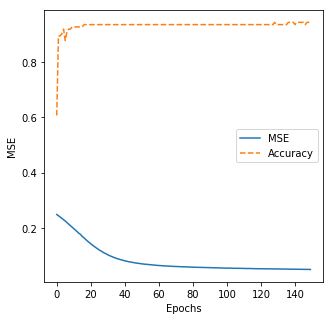

In [21]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['loss'], label='MSE')
plt.plot(history1['accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for training', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

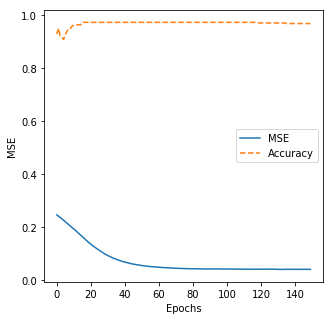

In [22]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['val_loss'], label='MSE')
plt.plot(history1['val_accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for test', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
mse, accuracy = model1.evaluate(X_test3, y_test3)

432/432 [==============================] - 0s 19us/step


In [18]:
print("Accuracy on Test", accuracy)
print("MSE on Test", mse)

Accuracy on Test 0.9675925970077515
MSE on Test 0.040549751888546676


In [19]:
mse_tr, accuracy_tr = model1.evaluate(X_train3, y_train3)

122/122 [==============================] - 0s 86us/step


In [20]:
print("Accuracy on Training", accuracy_tr)
print("MSE on Training", mse_tr)

Accuracy on Training 0.9426229596138
MSE on Training 0.0503210794241702
